In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from importlib import reload

import ERA_Fields_New as ef

import xarray as xr

In [14]:
reload(ef)

In this environment you cannot import Basemap


<module 'ERA_Fields_New' from '/Users/alessandrolovo/Repos/Climate-Learning/ERA/ERA_Fields_New.py'>

In [2]:
%%time
tas1 = ef.Plasim_Field('tas', 'tas_ds.nc', '2m T', Model='Plasim', mylocal='../../EW2-heatwaves/data/')
tas2 = ef.Plasim_Field('tas', 'tas_ds.nc', '2m T', Model='Plasim', mylocal='../../EW2-heatwaves/data/')
# tas = ef.Plasim_Field('tas', 'Data_Plasim_LONG/ANO_LONG_tas.nc', '2m T', Model='Plasim',)

The loaded field has 500 years, not 1000 as provided. Setting self.years = 500
The loaded field has 500 years, not 1000 as provided. Setting self.years = 500


CPU times: user 632 ms, sys: 26.5 ms, total: 659 ms
Wall time: 689 ms


In [4]:
for tas in [tas1, tas2]:
    tas.select_years(np.arange(10))

In [3]:
for tas in [tas1, tas2]:
    tas.set_mask('France')

In [5]:
tas2.select_lonlat(lon_start=64, lon_end=64)

In [7]:
ma1 = tas1.area_integral
ma2 = tas2.area_integral

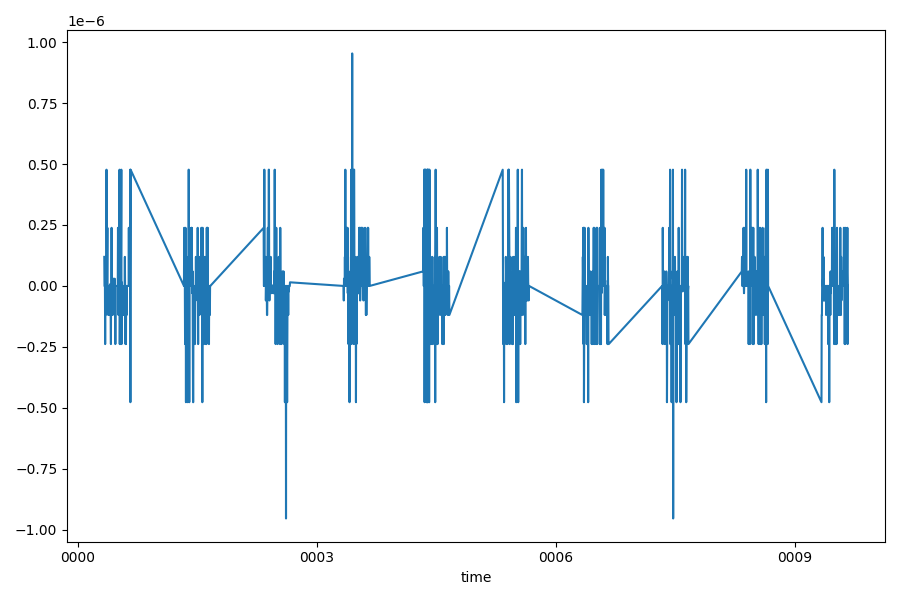

In [10]:
plt.close(1)
fig, ax = plt.subplots(num=1, figsize=(9,6))

(ma2 - ma1).plot(ax=ax)


fig.tight_layout()

In [13]:
(tas1.land_area_weights == tas2.land_area_weights).all()

<xarray.DataArray 'lsm' ()>
array(True)

In [14]:
(tas1.field == tas2.field).all()

<xarray.DataArray 'tas' ()>
array(True)

In [15]:
(tas1.mask == tas2.mask).all()

<xarray.DataArray 'lsm' ()>
array(True)

In [18]:
((tas1.field*tas1.land_area_weights.where(tas1.mask, 0)).sum(dim=['lat', 'lon']) == (tas2.field*tas2.land_area_weights.where(tas2.mask, 0)).sum(dim=['lat', 'lon'])).all()

<xarray.DataArray ()>
array(False)

In [19]:
_xa1 = tas1.field*tas1.land_area_weights.where(tas1.mask, 0)
_xa2 = tas2.field*tas2.land_area_weights.where(tas2.mask, 0)

In [20]:
(_xa1 == _xa2).all()

<xarray.DataArray ()>
array(True)

In [34]:
dim = ['lon', 'lat']
(_xa1.sum(dim=dim) == _xa2.sum(dim=dim)).all()

<xarray.DataArray ()>
array(False)

In [35]:
(_xa1.sum(dim='lon').sum(dim='lat') == _xa2.sum(dim='lon').sum(dim='lat')).all()

<xarray.DataArray ()>
array(True)

In [ ]:
xr.DataArray